#  HORSE DEATH PREDICTION

# 1) Problem statement.
-This dataset comprises of health information from a horse firm.
-If user can predict the death of the horse based on input features.
-Prediction results can be used to give horse owners likelihood of their horses to die based on their health information.
# 2) Data Collection.
-The Dataset is collected  from Kaggle webiste
-The data consists of 29 column and 1235 rows.

# Import libraries


In [1]:
#import necessary libraries
#import packages
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix 
import json
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
print('Load Libraries-Done')

Load Libraries-Done


# Loading the dataset

In [2]:
df= pd.read_csv("train.csv")
df

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,...,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,...,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,...,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived
1233,1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,...,58.0,74.0,cloudy,2.0,yes,2209,0,0,no,lived


# EDA

In [3]:
data=df

In [4]:
print("="*50)
print("First Five rows ","\n")
print(data.head(5),"\n")

print("="*50)
print("Information About Dataset","\n")
print(data.info(),"\n")

print("="*50)
print("Describe the Dataset","\n")
print(data.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(data.isnull().sum(),"\n")

print("="*50)
print(" Shape of the Dataset","\n")
print(data.shape,"\n")


First Five rows  

   id surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0   0     yes  adult           530001         38.1  132.0              24.0   
1   1     yes  adult           533836         37.5   88.0              12.0   
2   2     yes  adult           529812         38.3  120.0              28.0   
3   3     yes  adult          5262541         37.1   72.0              30.0   
4   4      no  adult          5299629         38.0   52.0              48.0   

  temp_of_extremities peripheral_pulse mucous_membrane  ...  \
0                cool          reduced   dark_cyanotic  ...   
1                cool           normal   pale_cyanotic  ...   
2                cool          reduced       pale_pink  ...   
3                cold          reduced       pale_pink  ...   
4              normal           normal     normal_pink  ...   

  packed_cell_volume total_protein abdomo_appearance abdomo_protein  \
0               57.0           8.5     serosanguious    

In [5]:
data[data.isnull().any(axis=1)]

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome


In [6]:
df.isnull().sum()

id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

In [7]:
df.columns

Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'outcome'],
      dtype='object')

In [8]:
#fix spaces and column names
df.columns= df.columns.str.strip()
df.columns

Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'outcome'],
      dtype='object')

In [9]:
# checking for duplicate rows in the dataset
df.duplicated().sum()

0

In [10]:
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [11]:
df['mucous_membrane'].unique()

array(['dark_cyanotic', 'pale_cyanotic', 'pale_pink', 'normal_pink',
       'bright_pink', 'bright_red', 'None'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1235 non-null   object 
 8   peripheral_pulse       1235 non-null   object 
 9   mucous_membrane        1235 non-null   object 
 10  capillary_refill_time  1235 non-null   object 
 11  pain                   1235 non-null   object 
 12  peristalsis            1235 non-null   object 
 13  abdominal_distention   1235 non-null   object 
 14  nasogastric_tube       1235 non-null   object 
 15  naso

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,...,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,...,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,...,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived
1233,1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,...,58.0,74.0,cloudy,2.0,yes,2209,0,0,no,lived


In [14]:
df.columns

Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'outcome'],
      dtype='object')

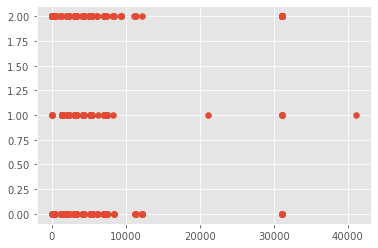

In [41]:
plt.scatter(df['lesion_1'], df['outcome'])

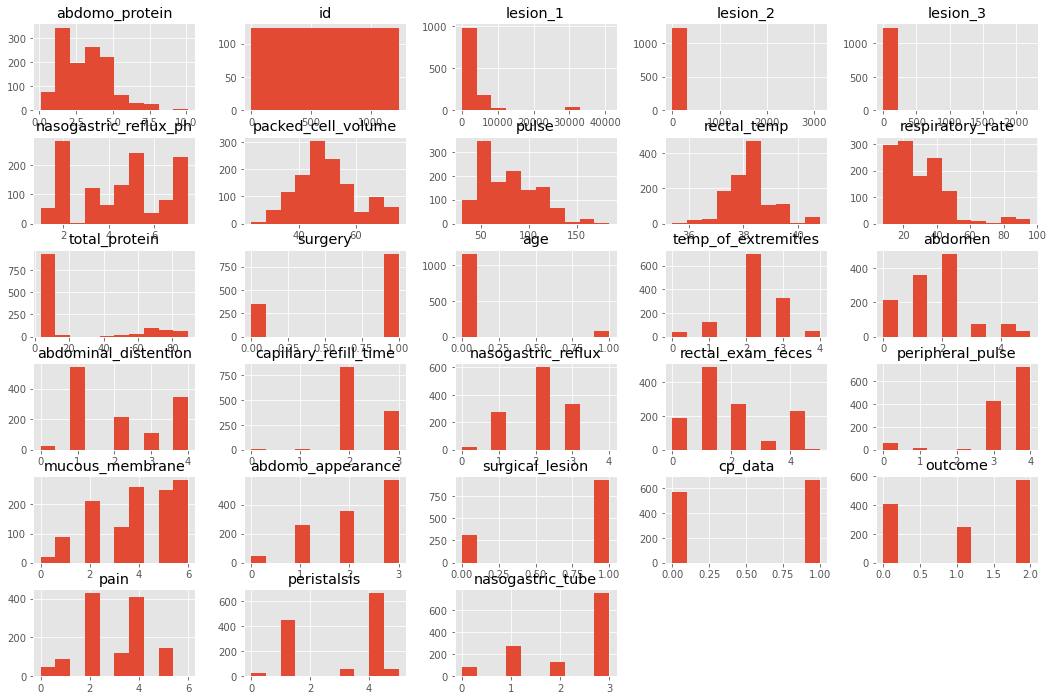

In [42]:
df.hist(figsize=(18,12))
plt.show()

In [43]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    sns.set_palette(sns.color_palette("Set1", 8))
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',ax=ax_box)
    ax_box.set(xlabel='')
    
    # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True)
    sns.set_palette(sns.color_palette("Set1", 8))
    sns.distplot(data,kde=False,ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

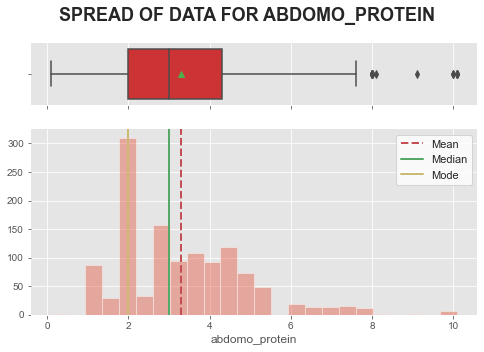

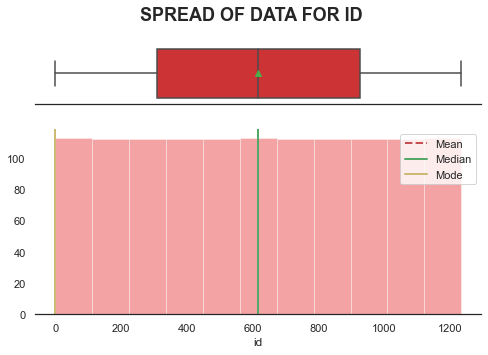

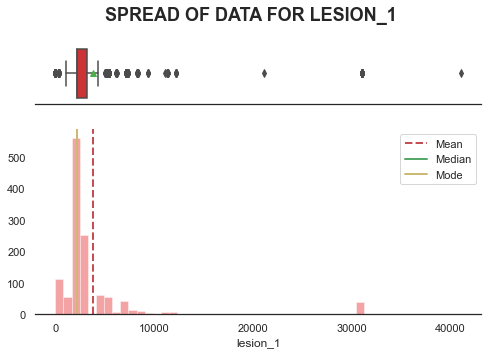

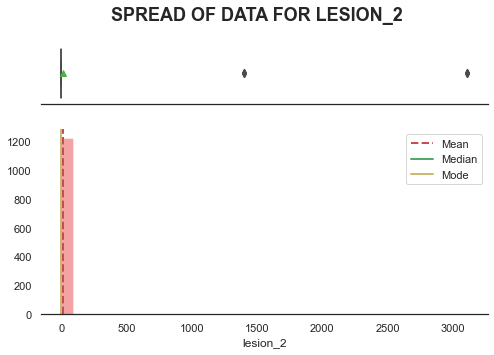

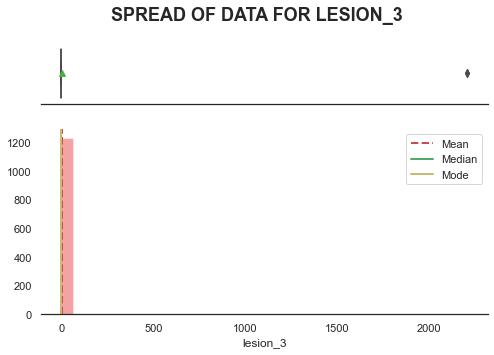

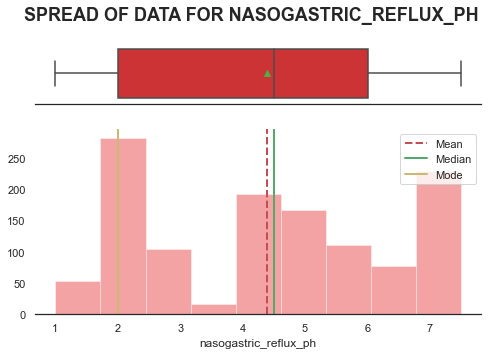

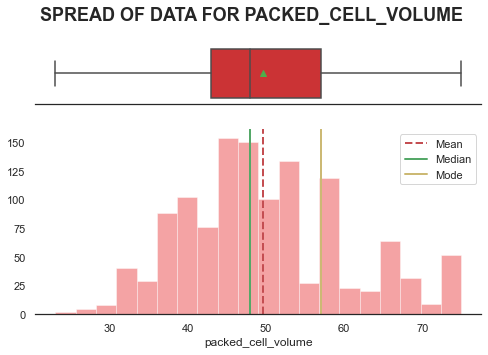

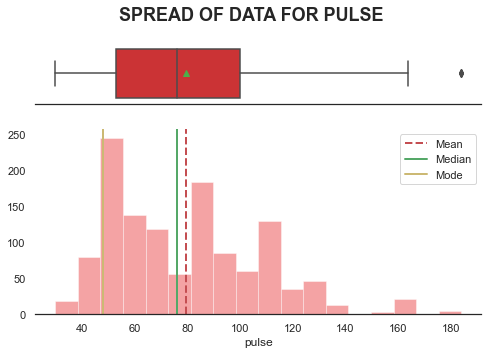

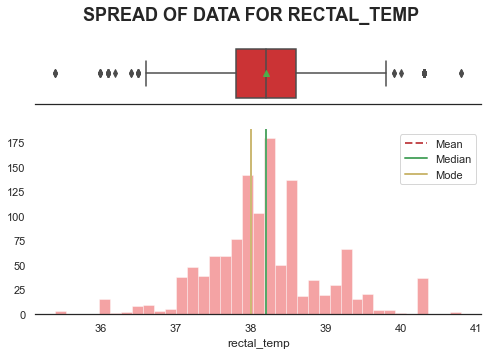

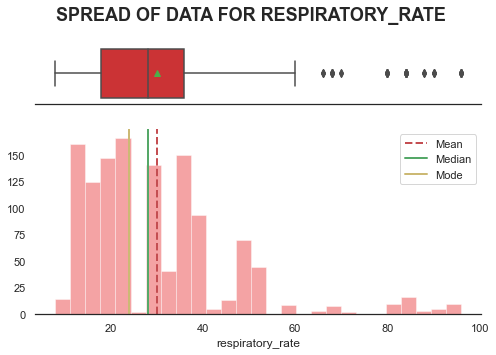

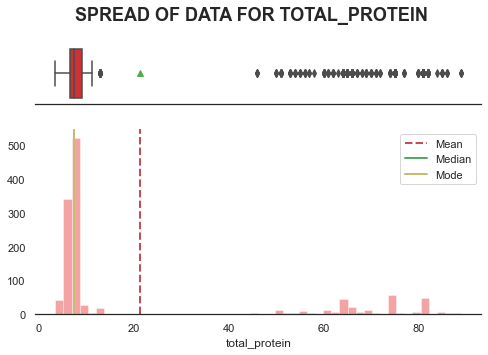

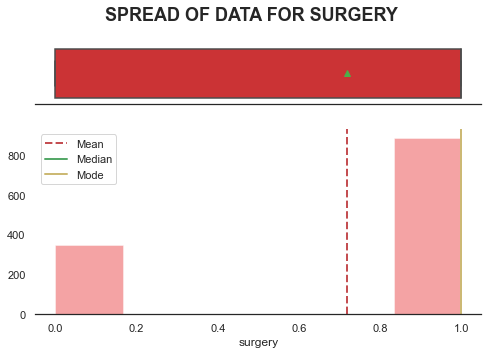

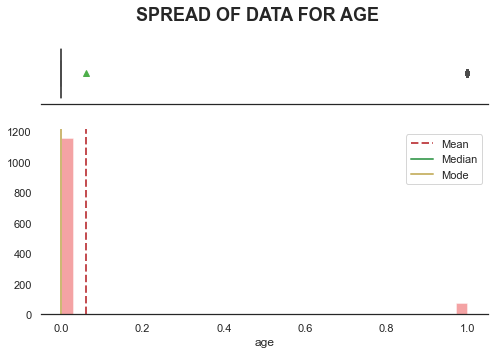

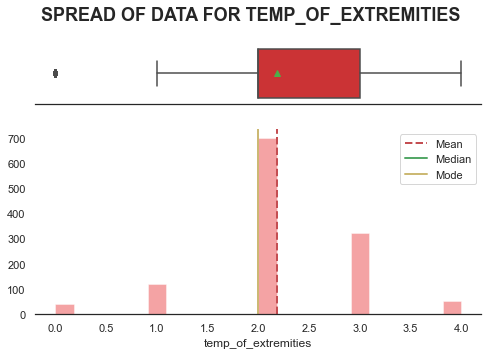

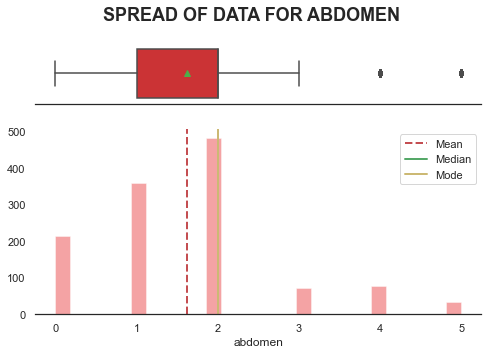

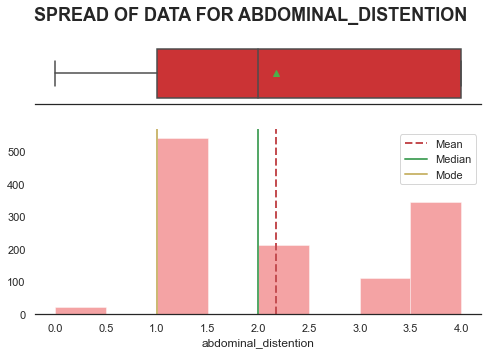

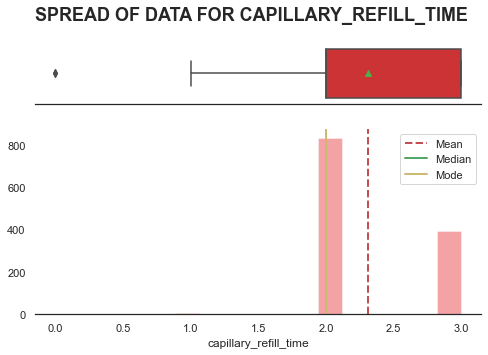

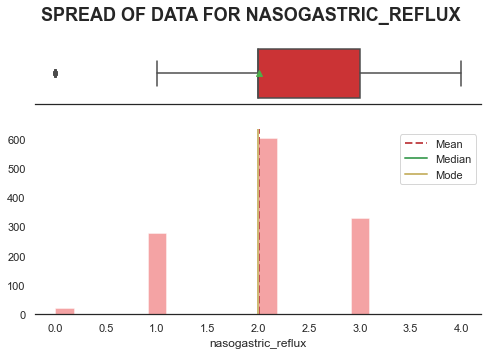

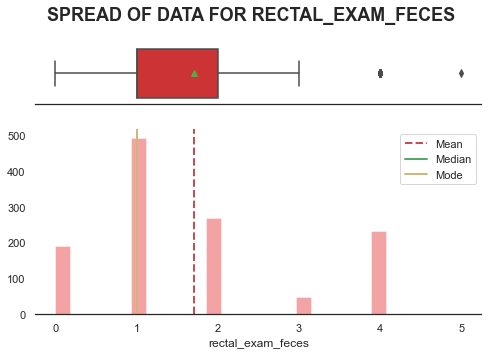

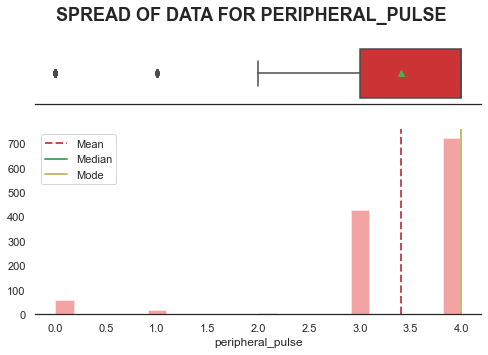

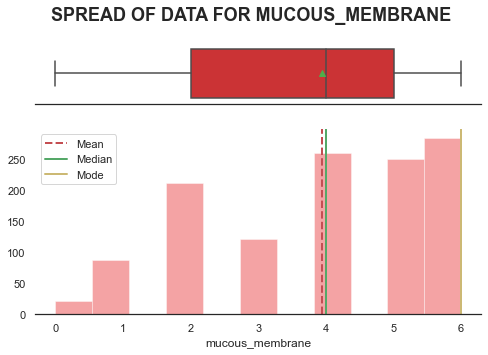

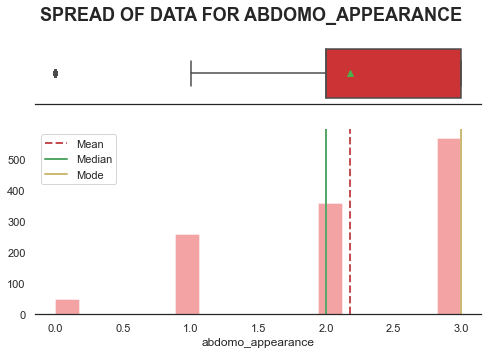

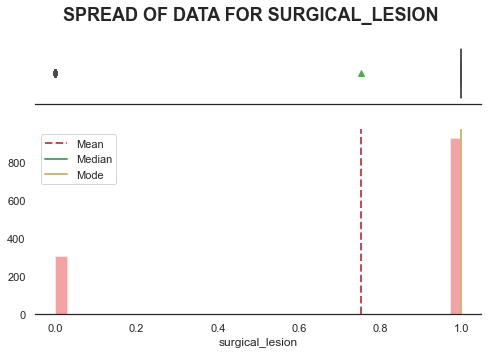

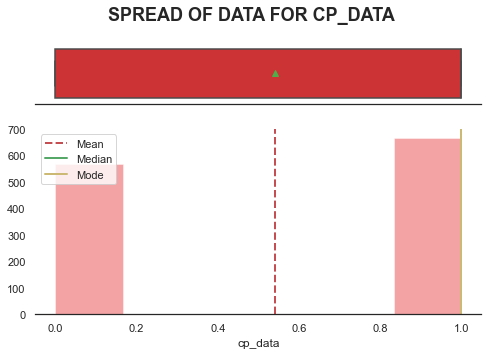

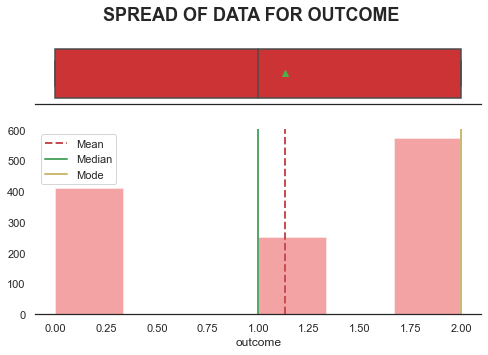

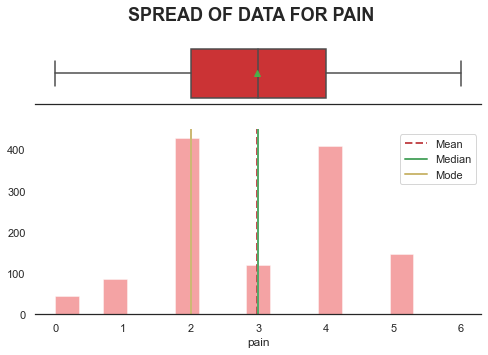

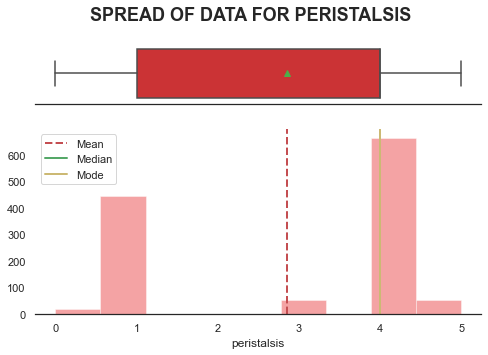

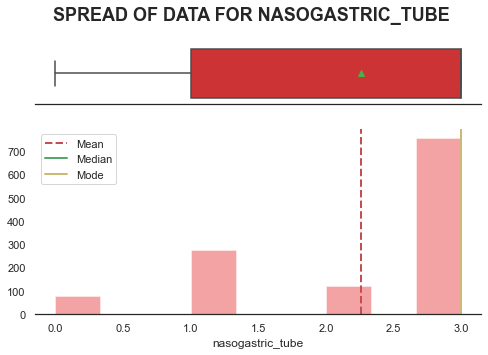

In [44]:
#select all quantitative columns for checking the spread
list_col= df.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

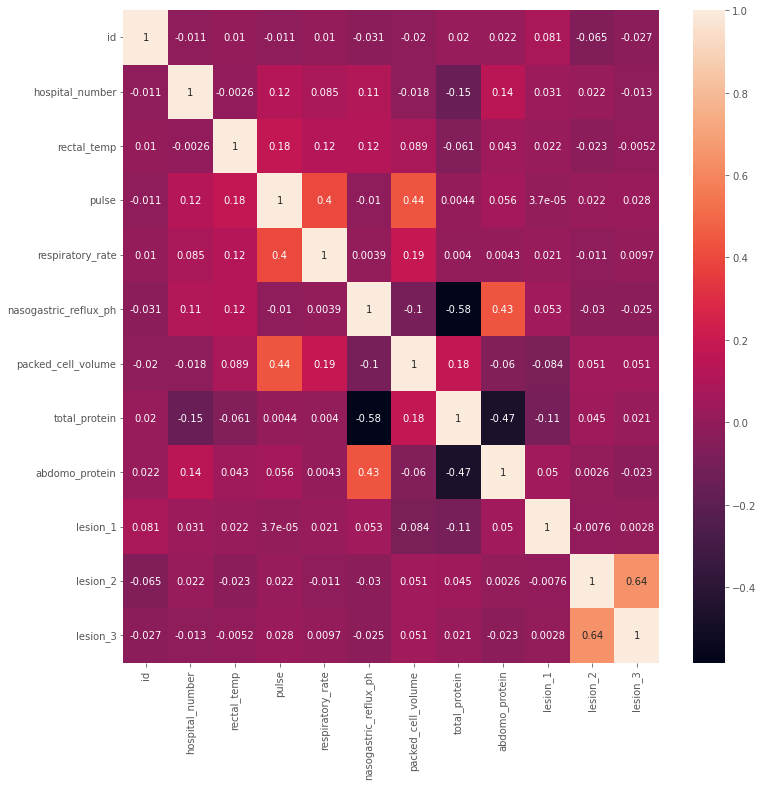

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [17]:
#Correlation with output variable
#cor = df.corr()
#cor_target = (cor['outcome'].sort_values(ascending=True))
#cor_target

# FEATURE ENGINEERING

In [18]:
# making new dataframe
df_prep = df.copy()
ord_feature_list= ["surgery","age",'temp_of_extremities','abdomen','abdominal_distention','capillary_refill_time','nasogastric_reflux','rectal_exam_feces',
                   'peripheral_pulse','mucous_membrane','abdomo_appearance','surgical_lesion','cp_data','outcome','pain','peristalsis','nasogastric_tube']

In [19]:
#encoding
from sklearn.preprocessing import OrdinalEncoder
df_ord=df_prep[ord_feature_list]

enc = OrdinalEncoder()
enc.fit(df_ord)
df_ord_arr=enc.transform(df_ord)

encoded_cat_df=pd.DataFrame(df_ord_arr, columns=ord_feature_list)
encoded_cat_df

,surgery,age,temp_of_extremities,abdomen,abdominal_distention,capillary_refill_time,nasogastric_reflux,rectal_exam_feces,peripheral_pulse,mucous_membrane,abdomo_appearance,surgical_lesion,cp_data,outcome,pain,peristalsis,nasogastric_tube
0,1.0,0.0,2.0,2.0,4.0,3.0,1.0,2.0,4.0,3.0,3.0,1.0,0.0,0.0,2.0,1.0,3.0
1,1.0,0.0,2.0,2.0,1.0,3.0,2.0,1.0,3.0,5.0,3.0,1.0,0.0,1.0,4.0,1.0,1.0
2,1.0,0.0,2.0,1.0,1.0,2.0,3.0,0.0,4.0,6.0,3.0,1.0,0.0,2.0,3.0,4.0,3.0
3,1.0,0.0,1.0,2.0,1.0,3.0,2.0,2.0,4.0,6.0,2.0,1.0,1.0,2.0,4.0,4.0,3.0
4,0.0,0.0,3.0,4.0,2.0,2.0,1.0,4.0,3.0,4.0,2.0,0.0,1.0,2.0,1.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1.0,0.0,2.0,1.0,1.0,3.0,2.0,0.0,4.0,6.0,3.0,1.0,0.0,2.0,2.0,1.0,1.0
1231,1.0,0.0,2.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,3.0,1.0,1.0,0.0,4.0,4.0,3.0
1232,1.0,1.0,3.0,3.0,4.0,2.0,3.0,3.0,4.0,4.0,2.0,1.0,1.0,2.0,4.0,4.0,3.0
1233,1.0,0.0,3.0,2.0,4.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,0.0,2.0,4.0,4.0,1.0


In [20]:
df = pd.concat( [df[df.columns.difference(ord_feature_list)] , encoded_cat_df ], axis= 1)
df

,abdomo_protein,hospital_number,id,lesion_1,lesion_2,lesion_3,nasogastric_reflux_ph,packed_cell_volume,pulse,rectal_temp,...,rectal_exam_feces,peripheral_pulse,mucous_membrane,abdomo_appearance,surgical_lesion,cp_data,outcome,pain,peristalsis,nasogastric_tube
0,3.4,530001,0,2209,0,0,6.5,57.0,132.0,38.1,...,2.0,4.0,3.0,3.0,1.0,0.0,0.0,2.0,1.0,3.0
1,2.0,533836,1,2208,0,0,2.0,33.0,88.0,37.5,...,1.0,3.0,5.0,3.0,1.0,0.0,1.0,4.0,1.0,1.0
2,3.4,529812,2,5124,0,0,3.5,37.0,120.0,38.3,...,0.0,4.0,6.0,3.0,1.0,0.0,2.0,3.0,4.0,3.0
3,3.9,5262541,3,2208,0,0,2.0,53.0,72.0,37.1,...,2.0,4.0,6.0,2.0,1.0,1.0,2.0,4.0,4.0,3.0
4,2.6,5299629,4,0,0,0,7.0,47.0,52.0,38.0,...,4.0,3.0,4.0,2.0,0.0,1.0,2.0,1.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2.0,535246,1230,2206,0,0,2.0,57.0,129.0,38.5,...,0.0,4.0,6.0,3.0,1.0,0.0,2.0,2.0,1.0,1.0
1231,3.6,528570,1231,2209,0,0,3.0,35.0,60.0,37.5,...,2.0,4.0,5.0,3.0,1.0,1.0,0.0,4.0,4.0,3.0
1232,7.0,529685,1232,400,0,0,3.0,40.0,84.0,37.5,...,3.0,4.0,4.0,2.0,1.0,1.0,2.0,4.0,4.0,3.0
1233,2.0,534784,1233,2209,0,0,2.0,58.0,70.0,38.1,...,1.0,4.0,2.0,2.0,1.0,0.0,2.0,4.0,4.0,1.0


In [21]:
#Reduce number of features with lower correlation values or it has an inverse effect on the results of the model
columns_to_drop = ['hospital_number']
df = df.drop(columns=columns_to_drop)
df.head()

,abdomo_protein,id,lesion_1,lesion_2,lesion_3,nasogastric_reflux_ph,packed_cell_volume,pulse,rectal_temp,respiratory_rate,...,rectal_exam_feces,peripheral_pulse,mucous_membrane,abdomo_appearance,surgical_lesion,cp_data,outcome,pain,peristalsis,nasogastric_tube
0,3.4,0,2209,0,0,6.5,57.0,132.0,38.1,24.0,...,2.0,4.0,3.0,3.0,1.0,0.0,0.0,2.0,1.0,3.0
1,2.0,1,2208,0,0,2.0,33.0,88.0,37.5,12.0,...,1.0,3.0,5.0,3.0,1.0,0.0,1.0,4.0,1.0,1.0
2,3.4,2,5124,0,0,3.5,37.0,120.0,38.3,28.0,...,0.0,4.0,6.0,3.0,1.0,0.0,2.0,3.0,4.0,3.0
3,3.9,3,2208,0,0,2.0,53.0,72.0,37.1,30.0,...,2.0,4.0,6.0,2.0,1.0,1.0,2.0,4.0,4.0,3.0
4,2.6,4,0,0,0,7.0,47.0,52.0,38.0,48.0,...,4.0,3.0,4.0,2.0,0.0,1.0,2.0,1.0,4.0,3.0


# MODEL BUILDING

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [22]:
#Splitting the data into X and y, training (80%) and testing (20%) set
from sklearn.model_selection import train_test_split
X = df.drop("outcome", axis= 1)
y = df['outcome']

# split data into 80-20 for training set / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((988, 27), (247, 27), (988,), (247,))

In [23]:
#normalization(make all values bet. 0-1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_normalized_arr=scaler.transform(X_train)
X_train_normalized_df=pd.DataFrame(X_train_normalized_arr, columns=X_train.columns.to_list())

X_test_normalized_arr=scaler.transform(X_test)
X_test_normalized_df=pd.DataFrame(X_test_normalized_arr, columns=X_test.columns.to_list())

In [24]:
X_train_normalized_df

,abdomo_protein,id,lesion_1,lesion_2,lesion_3,nasogastric_reflux_ph,packed_cell_volume,pulse,rectal_temp,respiratory_rate,...,nasogastric_reflux,rectal_exam_feces,peripheral_pulse,mucous_membrane,abdomo_appearance,surgical_lesion,cp_data,pain,peristalsis,nasogastric_tube
0,0.175824,0.929383,0.051399,0.0,0.0,0.153846,0.692308,0.454545,0.666667,0.488636,...,0.666667,0.2,1.00,0.500000,0.666667,1.0,0.0,0.4,0.2,0.000000
1,0.109890,0.637175,0.000000,0.0,0.0,0.615385,0.269231,0.155844,0.611111,0.045455,...,0.666667,0.8,0.75,1.000000,0.666667,0.0,0.0,0.2,1.0,0.333333
2,0.384615,0.434253,0.077962,0.0,0.0,0.923077,0.653846,0.350649,0.907407,0.318182,...,1.000000,0.8,1.00,0.666667,1.000000,1.0,1.0,1.0,0.8,1.000000
3,0.065934,0.918831,0.051374,0.0,0.0,0.661538,0.384615,0.142857,0.500000,0.681818,...,0.666667,0.2,0.75,0.333333,0.666667,1.0,1.0,0.4,0.8,1.000000
4,0.109890,0.908279,0.053637,0.0,0.0,0.153846,0.557692,0.454545,0.796296,0.181818,...,0.666667,0.0,1.00,0.833333,0.666667,1.0,0.0,0.0,0.2,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,0.219780,0.111201,0.053685,0.0,0.0,0.153846,0.711538,0.428571,0.481481,0.090909,...,0.333333,0.2,1.00,0.333333,0.666667,1.0,0.0,1.0,0.8,0.666667
984,0.109890,0.123377,0.051399,0.0,0.0,0.153846,0.826923,0.454545,0.722222,0.488636,...,0.333333,0.0,0.25,0.333333,1.000000,1.0,0.0,0.4,0.8,0.333333
985,0.109890,0.268669,0.034055,0.0,0.0,0.000000,1.000000,0.233766,0.666667,0.818182,...,1.000000,0.2,1.00,0.333333,0.666667,1.0,1.0,0.8,0.8,1.000000
986,0.362637,0.848214,0.053685,0.0,0.0,0.461538,1.000000,0.480519,0.370370,0.045455,...,0.666667,0.2,1.00,0.500000,1.000000,1.0,1.0,0.4,0.2,0.333333


In [32]:
X_train= X_train_normalized_df
X_test= X_test_normalized_df

### model selection

In [33]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [34]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor":AdaBoostRegressor()
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.7641
- Mean Absolute Error: 0.6569
- R2 Score: 0.2504
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.7461
- Mean Absolute Error: 0.6388
- R2 Score: 0.2860


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.8826
- Mean Absolute Error: 0.8060
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.8830
- Mean Absolute Error: 0.8067
- R2 Score: -0.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.7643
- Mean Absolute Error: 0.6580
- R2 Score: 0.2502
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.7446
- Mean Absolute Error: 0.6393
- R2 Score: 0.2889


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.6705
- Mean Absolute Error: 0.5138
- R2 Score: 0.4228
----------------------

In [35]:
#Initialize few parameter for Hyperparamter tuning
knn_params = {"n_neighbors": [2, 3, 10, 20, 40, 50]}
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

ada_params={
    "n_estimators":[50,60,70,80],
    "loss":['linear','square','exponential']
}

In [36]:
# Models list for Hyperparameter tuning
randomcv_models = [('KNN', KNeighborsRegressor(), knn_params),
                   ("RF", RandomForestRegressor(), rf_params),
                   ("Adaboost",AdaBoostRegressor(),ada_params)
                   
                   ]

In [37]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
---------------- Best Params for KNN -------------------
{'n_neighbors': 20}
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 5, 'max_depth': None}
---------------- Best Params for Adaboost -------------------
{'n_estimators': 80, 'loss': 'linear'}


In [38]:
## Retraining the models with best parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=200, min_samples_split=2, max_features=5, max_depth=None, 
                                                     n_jobs=-1),
     "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=20, n_jobs=-1),
     "Adaboost":AdaBoostRegressor(n_estimators=80,loss='linear')
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2724
- Mean Absolute Error: 0.2249
- R2 Score: 0.9047
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.7012
- Mean Absolute Error: 0.5817
- R2 Score: 0.3693


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.7407
- Mean Absolute Error: 0.6222
- R2 Score: 0.2957
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.7301
- Mean Absolute Error: 0.6059
- R2 Score: 0.3164


Adaboost
Model performance for Training set
- Root Mean Squared Error: 0.7368
- Mean Absolute Error: 0.6516
- R2 Score: 0.3031
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.7541
- Mean Absolute Error: 0.6619
- R2 Score: 0.2706




## CONCLUSION

Based on the provided performance metrics, the Random Forest Regressor is the best model among the three options for your task. Here's why:

1. **Root Mean Squared Error (RMSE)**: The Random Forest Regressor has the lowest RMSE for both the training set (0.2724) and the test set (0.7012). Lower RMSE indicates a better fit to the data, meaning the model's predictions are closer to the actual values. In comparison, both K-Neighbors Regressor and Adaboost have higher RMSE values, indicating poorer performance in terms of prediction accuracy.

2. **Mean Absolute Error (MAE)**: Similar to RMSE, the Random Forest Regressor also has the lowest MAE for both training (0.2249) and test (0.5817) sets. Again, lower MAE suggests better accuracy. The other models have higher MAE values, indicating larger errors in prediction.

3. **R2 Score**: The R2 score measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R2 score indicates a better fit. The Random Forest Regressor has the highest R2 score for both training (0.9047) and test (0.3693) sets. While these R2 scores might not be extremely high, they are comparatively better than the scores from the other models.

In summary, the Random Forest Regressor outperforms the K-Neighbors Regressor and Adaboost models in terms of RMSE, MAE, and R2 score for both the training and test datasets. Therefore, it is the best model among the options provided for your task.